In [ ]:
!pip install keras

In [ ]:
!pip install numpy

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _),(x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


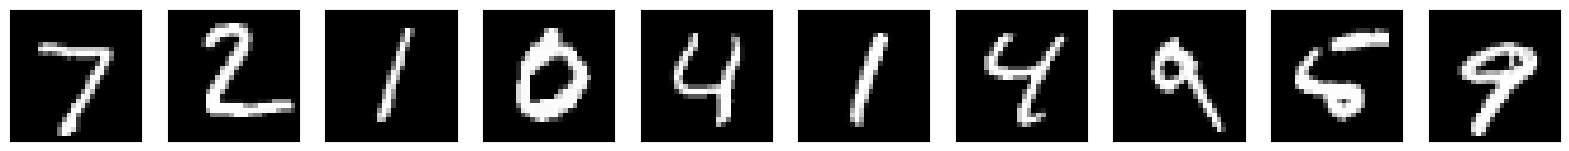

In [ ]:
n=10

plt.figure(figsize=(20, 4))

for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
x_train= x_train.reshape(len(x_train), 28*28*1)
x_test= x_test.reshape(len(x_test), 28*28*1)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Reshape

In [ ]:
input_layer_conv= Input(shape=(28, 28, 1))
ae_conv_en= Conv2D(32,(3,3), activation='relu' ,padding='same', kernel_initializer='he_normal')(input_layer_conv)
ae_conv_en= MaxPooling2D((2,2),padding='same')(ae_conv_en)

ae_conv_en= Conv2D(32,(3,3), activation='relu' ,padding='same')(ae_conv_en)
ae_conv_en= MaxPooling2D((2,2),padding='same')(ae_conv_en)

ae_conv_en= Conv2D(4,(3,3), activation='relu' ,padding='same')(ae_conv_en)
ae_conv_en= MaxPooling2D((2,2),padding='same')(ae_conv_en)

ae_conv_en= Flatten(name='bot')(ae_conv_en)

ae_conv_de= Reshape((4,4,4), input_shape=(64,), name='botnext0')(ae_conv_en)
ae_conv_de = Conv2D(4,(3,3),activation='relu',padding='same', name='botnext1')(ae_conv_de)
ae_conv_de=UpSampling2D((2,2),name='botnext2')(ae_conv_de)

ae_conv_de = Conv2D(32,(3,3),activation='relu',padding='same', name='botnext3')(ae_conv_de)
ae_conv_de=UpSampling2D((2,2),name='botnext4')(ae_conv_de)

ae_conv_de = Conv2D(32,(3,3),activation='relu',padding='valid', name='botnext5')(ae_conv_de)
ae_conv_de=UpSampling2D((2,2),name='botnext6')(ae_conv_de)

ae_conv_de=Conv2D(1,(3,3),activation='sigmoid', padding='same', name='botnext7')(ae_conv_de)
Ae_Conv= Model(inputs=input_layer_conv, outputs=ae_conv_de)

Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5),loss='binary_crossentropy',metrics=['accuracy'])

# Ae_Conv.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           1156  

In [ ]:
ae_conv_encoder= Model(inputs= input_layer_conv, outputs=Ae_Conv.get_layer('bot').output,name='Conv_AE_encoder')
ae_conv_encoder.summary()

Model: "Conv_AE_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)       

In [ ]:
encode_inp_conv = Input(shape=(64,))
tmp_dec= Ae_Conv.get_layer('botnext0')(encode_inp_conv)
for i in range(1,8):
  st= 'botnext{}'.format(i)
  tmp_dec= Ae_Conv.get_layer(st)(tmp_dec)

Ae_Conv_decoder= Model(inputs= encode_inp_conv, outputs=tmp_dec, name='Conv_AE_decoder')
Ae_Conv_decoder.summary()

Model: "Conv_AE_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
 botnext2 (UpSampling2D)     (None, 8, 8, 4)           0         
                                                                 
 botnext3 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 botnext4 (UpSampling2D)     (None, 16, 16, 32)        0         
                                                                 
 botnext5 (Conv2D)           (None, 14, 14, 32)    

In [ ]:
x_train= x_train.reshape(x_train.shape[0], 28,28,1)
x_test= x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from time import time
tic=time()
Ae_Conv.fit(x_train, x_train,
             epochs=100,
             batch_size=1024,
             verbose=2,
             shuffle=False,
             validation_split=0.1)

toc=time()
print("Accuracy is : ",toc-tic)

Epoch 1/100
53/53 - 11s - loss: 0.4091 - accuracy: 0.7959 - val_loss: 0.2998 - val_accuracy: 0.8088 - 11s/epoch - 213ms/step
Epoch 2/100
53/53 - 2s - loss: 0.2531 - accuracy: 0.7911 - val_loss: 0.2357 - val_accuracy: 0.8013 - 2s/epoch - 29ms/step
Epoch 3/100
53/53 - 2s - loss: 0.2285 - accuracy: 0.7854 - val_loss: 0.2257 - val_accuracy: 0.7779 - 2s/epoch - 29ms/step
Epoch 4/100
53/53 - 2s - loss: 0.2211 - accuracy: 0.7861 - val_loss: 0.2192 - val_accuracy: 0.8025 - 2s/epoch - 31ms/step
Epoch 5/100
53/53 - 2s - loss: 0.2138 - accuracy: 0.7865 - val_loss: 0.2170 - val_accuracy: 0.8060 - 2s/epoch - 31ms/step
Epoch 6/100
53/53 - 2s - loss: 0.2077 - accuracy: 0.7881 - val_loss: 0.2228 - val_accuracy: 0.8068 - 2s/epoch - 30ms/step
Epoch 7/100
53/53 - 2s - loss: 0.2044 - accuracy: 0.7890 - val_loss: 0.2122 - val_accuracy: 0.8060 - 2s/epoch - 29ms/step
Epoch 8/100
53/53 - 2s - loss: 0.1997 - accuracy: 0.7902 - val_loss: 0.2142 - val_accuracy: 0.8061 - 2s/epoch - 29ms/step
Epoch 9/100
53/53 - 2

In [ ]:
encoded_img=ae_conv_encoder.predict(x_test)

print(encoded_img.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


313/313 [==============================] - 1s 2ms/step
Recreated image represenation of shapes  (10000, 28, 28, 1)  using Decoder and reduced images representation of shape  (10000, 64)


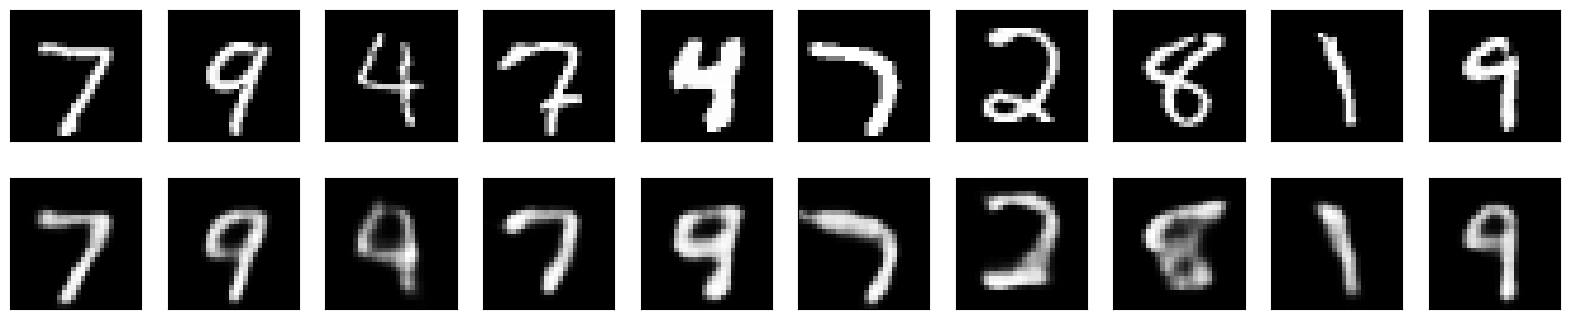

In [ ]:
decoded_img= Ae_Conv_decoder.predict(encoded_img)

decoded_images=Ae_Conv.predict(x_test)

print("Recreated image represenation of shapes ",decoded_img.shape," using Decoder and reduced images representation of shape ",encoded_img.shape)

n=10
k=12
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i*k].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_img[i*k].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

313/313 [==============================] - 1s 2ms/step
Recreated image represenation of shapes  (10000, 28, 28, 1)  using Decoder and reduced images representation of shape  (10000, 28, 28, 1)


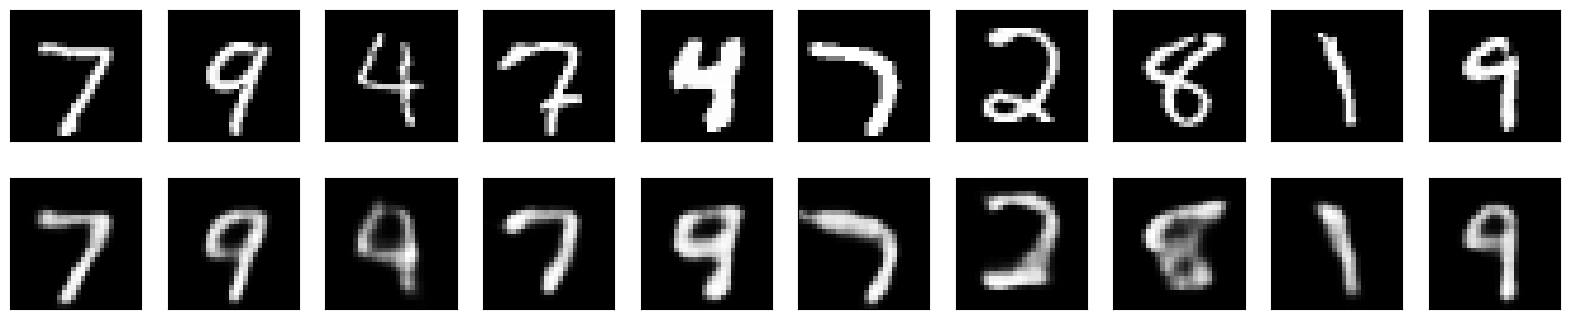

In [ ]:
decoded_images=Ae_Conv.predict(x_test)

print("Recreated image represenation of shapes ",decoded_images.shape," using Decoder and reduced images representation of shape ",decoded_images.shape)

n=10
k=12
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i*k].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_images[i*k].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
noise_factor = 0.5
x_train_noisy= x_train + noise_factor * np.random.normal(loc=0.0, scale= 1.0, size=x_train.shape)

x_test_noisy= x_test + noise_factor * np.random.normal(loc=0.0, scale= 1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape,x_test_noisy.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


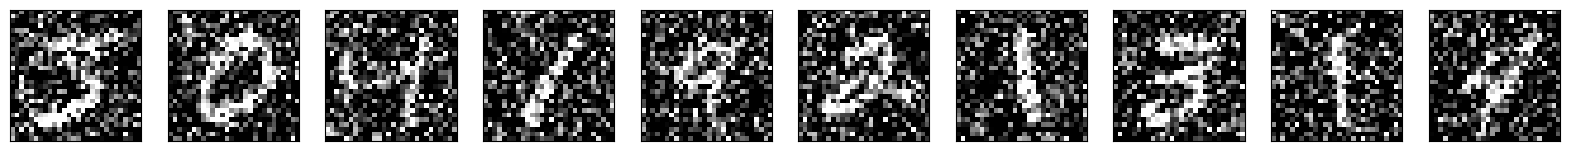

In [ ]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

plt.close()

In [ ]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)

ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv_denoise = Model (inputs = input_layer_cnv, outputs = ae_cnv_de)

Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv_denoise.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           1156

In [ ]:
ae_conv_dns_encoder = Model (inputs = input_layer_cnv,outputs = Ae_Conv_denoise.get_layer("bot").output, name = "Conv_AE_dns_encoder")
ae_conv_dns_encoder.summary()

Model: "Conv_AE_dns_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)   

Can you complete this
